In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
x = data.drop(['AgeCategory', 'Race', 'HeartDisease'], axis=1)
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,Fair,6.0,Yes,No,No
319791,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,Very good,5.0,Yes,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,Good,6.0,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,No,No,Good,12.0,No,No,No


In [5]:
y = data['HeartDisease']
y

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [6]:
data_fs = pd.concat([x,y], axis=1)
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,Yes,Very good,5.0,Yes,No,Yes,No
1,20.34,No,No,Yes,0.0,0.0,No,Female,No,Yes,Very good,7.0,No,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,Yes,Fair,8.0,Yes,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,No,No,Good,6.0,No,No,Yes,No
4,23.71,No,No,No,28.0,0.0,Yes,Female,No,Yes,Very good,8.0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,Yes,No,No,7.0,0.0,Yes,Male,Yes,No,Fair,6.0,Yes,No,No,Yes
319791,29.84,Yes,No,No,0.0,0.0,No,Male,No,Yes,Very good,5.0,Yes,No,No,No
319792,24.24,No,No,No,0.0,0.0,No,Female,No,Yes,Good,6.0,No,No,No,No
319793,32.81,No,No,No,0.0,0.0,No,Female,No,No,Good,12.0,No,No,No,No


In [7]:
le = preprocessing.LabelEncoder()

In [8]:
feature_encode = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in feature_encode:
    data_fs[column] = le.fit_transform(data_fs[column])

In [9]:
data_fs['HeartDisease'] = le.fit_transform(data_fs['HeartDisease'])

In [10]:
data_fs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,0,2,1,4,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,0,1,4,7.0,0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,2,1,1,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,0,2,6.0,0,0,1,0
4,23.71,0,0,0,28.0,0.0,1,0,0,1,4,8.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,2,0,1,6.0,1,0,0,1
319791,29.84,1,0,0,0.0,0.0,0,1,0,1,4,5.0,1,0,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,0,1,2,6.0,0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,0,0,2,12.0,0,0,0,0


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

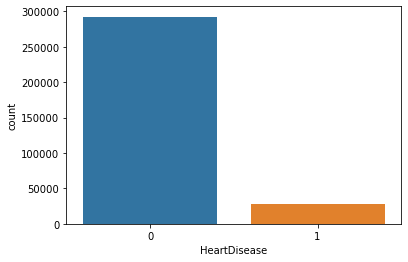

In [11]:
sns.countplot(x=data_fs['HeartDisease'], data=data_fs)

In [12]:
data_yes = data_fs[data_fs['HeartDisease'] == 1]
data_no = data_fs[data_fs['HeartDisease'] == 0]

In [13]:
num_samples = len(data_yes)
df_no_sampled = data_no.sample(num_samples)

In [14]:
data_balanced = pd.concat([data_yes, df_no_sampled])

In [15]:
data_balanced

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
5,28.87,1,0,0,6.0,0.0,1,0,0,0,1,12.0,0,0,0,1
10,34.30,1,0,0,30.0,0.0,1,1,2,0,3,15.0,1,0,0,1
35,32.98,1,0,1,10.0,0.0,1,1,2,1,3,4.0,0,0,1,1
42,25.06,0,0,0,0.0,0.0,1,0,2,0,2,7.0,0,0,1,1
43,30.23,1,0,0,6.0,2.0,1,0,2,1,1,8.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51629,20.53,0,0,0,0.0,0.0,0,0,0,1,0,8.0,0,0,0,0
128290,23.33,0,0,0,0.0,0.0,0,1,0,1,0,8.0,0,0,1,0
58773,26.26,1,0,0,0.0,30.0,0,0,0,1,4,2.0,0,0,0,0
179447,25.85,0,0,0,7.0,0.0,0,0,0,1,4,8.0,0,0,0,0


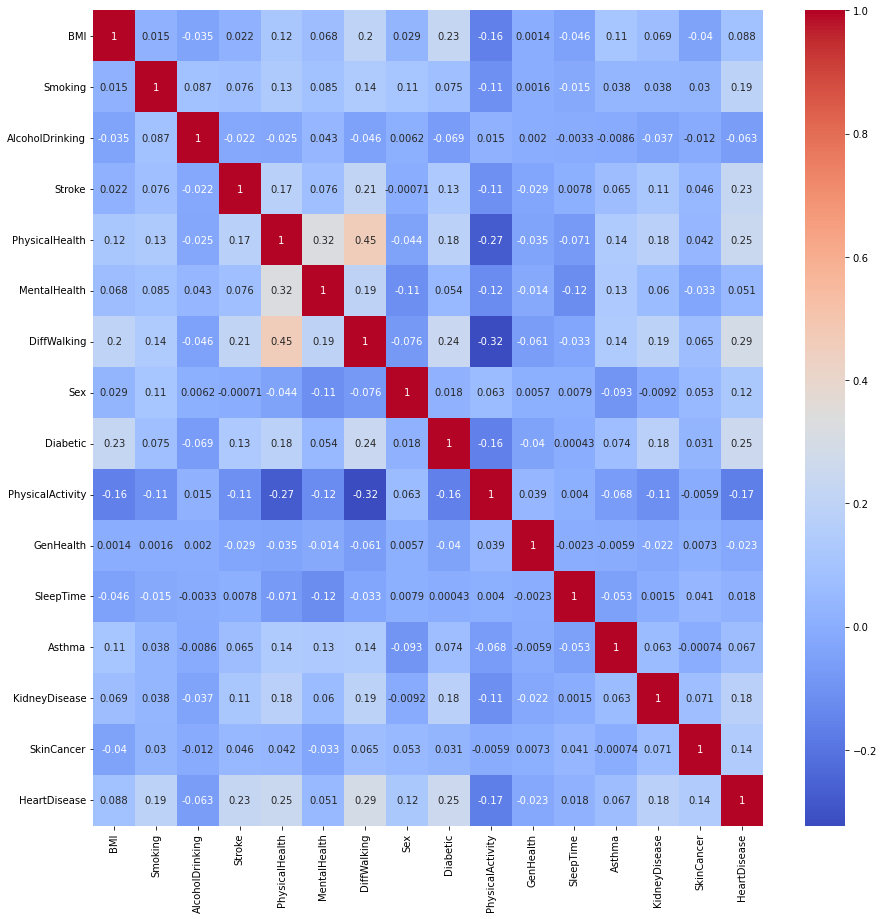

In [16]:
corr = data_balanced.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [17]:
data_balanced.duplicated().sum()

3005

In [18]:
data_balanced = data_balanced.drop(['BMI', 'AlcoholDrinking', 'MentalHealth', 'GenHealth', 'SleepTime', 'Asthma'], axis=1)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

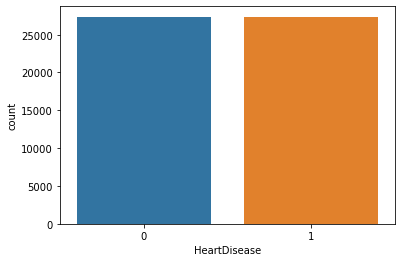

In [19]:
sns.countplot(x = data_balanced['HeartDisease'], data=data_balanced)

In [20]:
data_balanced = data_balanced.sample(frac=1, random_state=42)

In [21]:
data_balanced.isnull().sum()

Smoking             0
Stroke              0
PhysicalHealth      0
DiffWalking         0
Sex                 0
Diabetic            0
PhysicalActivity    0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

In [22]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 156231 to 183941
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Smoking           54746 non-null  int32  
 1   Stroke            54746 non-null  int32  
 2   PhysicalHealth    54746 non-null  float64
 3   DiffWalking       54746 non-null  int32  
 4   Sex               54746 non-null  int32  
 5   Diabetic          54746 non-null  int32  
 6   PhysicalActivity  54746 non-null  int32  
 7   KidneyDisease     54746 non-null  int32  
 8   SkinCancer        54746 non-null  int32  
 9   HeartDisease      54746 non-null  int32  
dtypes: float64(1), int32(9)
memory usage: 2.7 MB


In [23]:
x = data_balanced.iloc[:, 0:8].values
x

array([[ 1.,  1.,  0., ...,  2.,  1.,  0.],
       [ 0.,  1.,  0., ...,  2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 1.,  0., 30., ...,  0.,  1.,  0.],
       [ 1.,  0.,  5., ...,  2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  2.,  1.,  0.]])

In [24]:
y = data_balanced.iloc[:, 8].values
y

array([1, 0, 1, ..., 0, 0, 0])

In [25]:
scaler = StandardScaler()

In [26]:
x = scaler.fit_transform(x)

In [27]:
x

array([[ 1.01929248,  3.1042692 , -0.53875918, ...,  1.78922632,
         0.63260514, -0.28963087],
       [-0.98107267,  3.1042692 , -0.53875918, ...,  1.78922632,
         0.63260514, -0.28963087],
       [-0.98107267, -0.32213701, -0.53875918, ..., -0.56284015,
         0.63260514, -0.28963087],
       ...,
       [ 1.01929248, -0.32213701,  2.48712532, ..., -0.56284015,
         0.63260514, -0.28963087],
       [ 1.01929248, -0.32213701, -0.0344451 , ...,  1.78922632,
         0.63260514, -0.28963087],
       [-0.98107267, -0.32213701, -0.53875918, ...,  1.78922632,
         0.63260514, -0.28963087]])

In [28]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
def compare_classifiers(x_train, x_test, y_train, y_test):
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "SVM_linear": SVC(kernel='linear', probability=True),
        "SVM_rbf": SVC(kernel='rbf', probability=True),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(),
        "Logistic Regression": LogisticRegression()
    }
    
    results = {}
    roc_results = {}
    
    for classifier_name, classifier in classifiers.items():
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[classifier_name] = accuracy
        
        if hasattr(classifier, "predict_proba"):
            y_proba = classifier.predict_proba(x_test)
            fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
            roc_auc = auc(fpr, tpr)
            roc_results[classifier_name] = (fpr, tpr, roc_auc)
    
    sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
    
    for classifier_name, accuracy in sorted_results:
        print(f"{classifier_name}: {accuracy}")
    
    plt.figure(figsize=(10, 6))
    classifiers_names, accuracies = zip(*sorted_results)
    plt.barh(classifiers_names, accuracies)
    plt.xlabel("Accuracy")
    plt.ylabel("Classifier")
    plt.title("Comparison of Classifiers")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    for classifier_name, (fpr, tpr, roc_auc) in roc_results.items():
        plt.plot(fpr, tpr, label=f"{classifier_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

In [31]:
compare_classifiers(x_train, x_test, y_train, y_test)

SVM_linear: 0.8631050228310503
SVM_rbf: 0.8631050228310503
AdaBoost: 0.8631050228310503
Logistic Regression: 0.8631050228310503
Random Forest: 0.8578082191780821
Decision Tree: 0.857351598173516
Bagging: 0.8565296803652968
K-Nearest Neighbors: 0.8549771689497717
Naive Bayes: 0.802648401826484
